<p style="background-color:#000011;color:#fff;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:10px 10px; padding:10px;">Tabular Playground Series - Jul 2022</p>

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-jul-2022/data.csv")
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [4]:
df.isna().sum().sum()

0

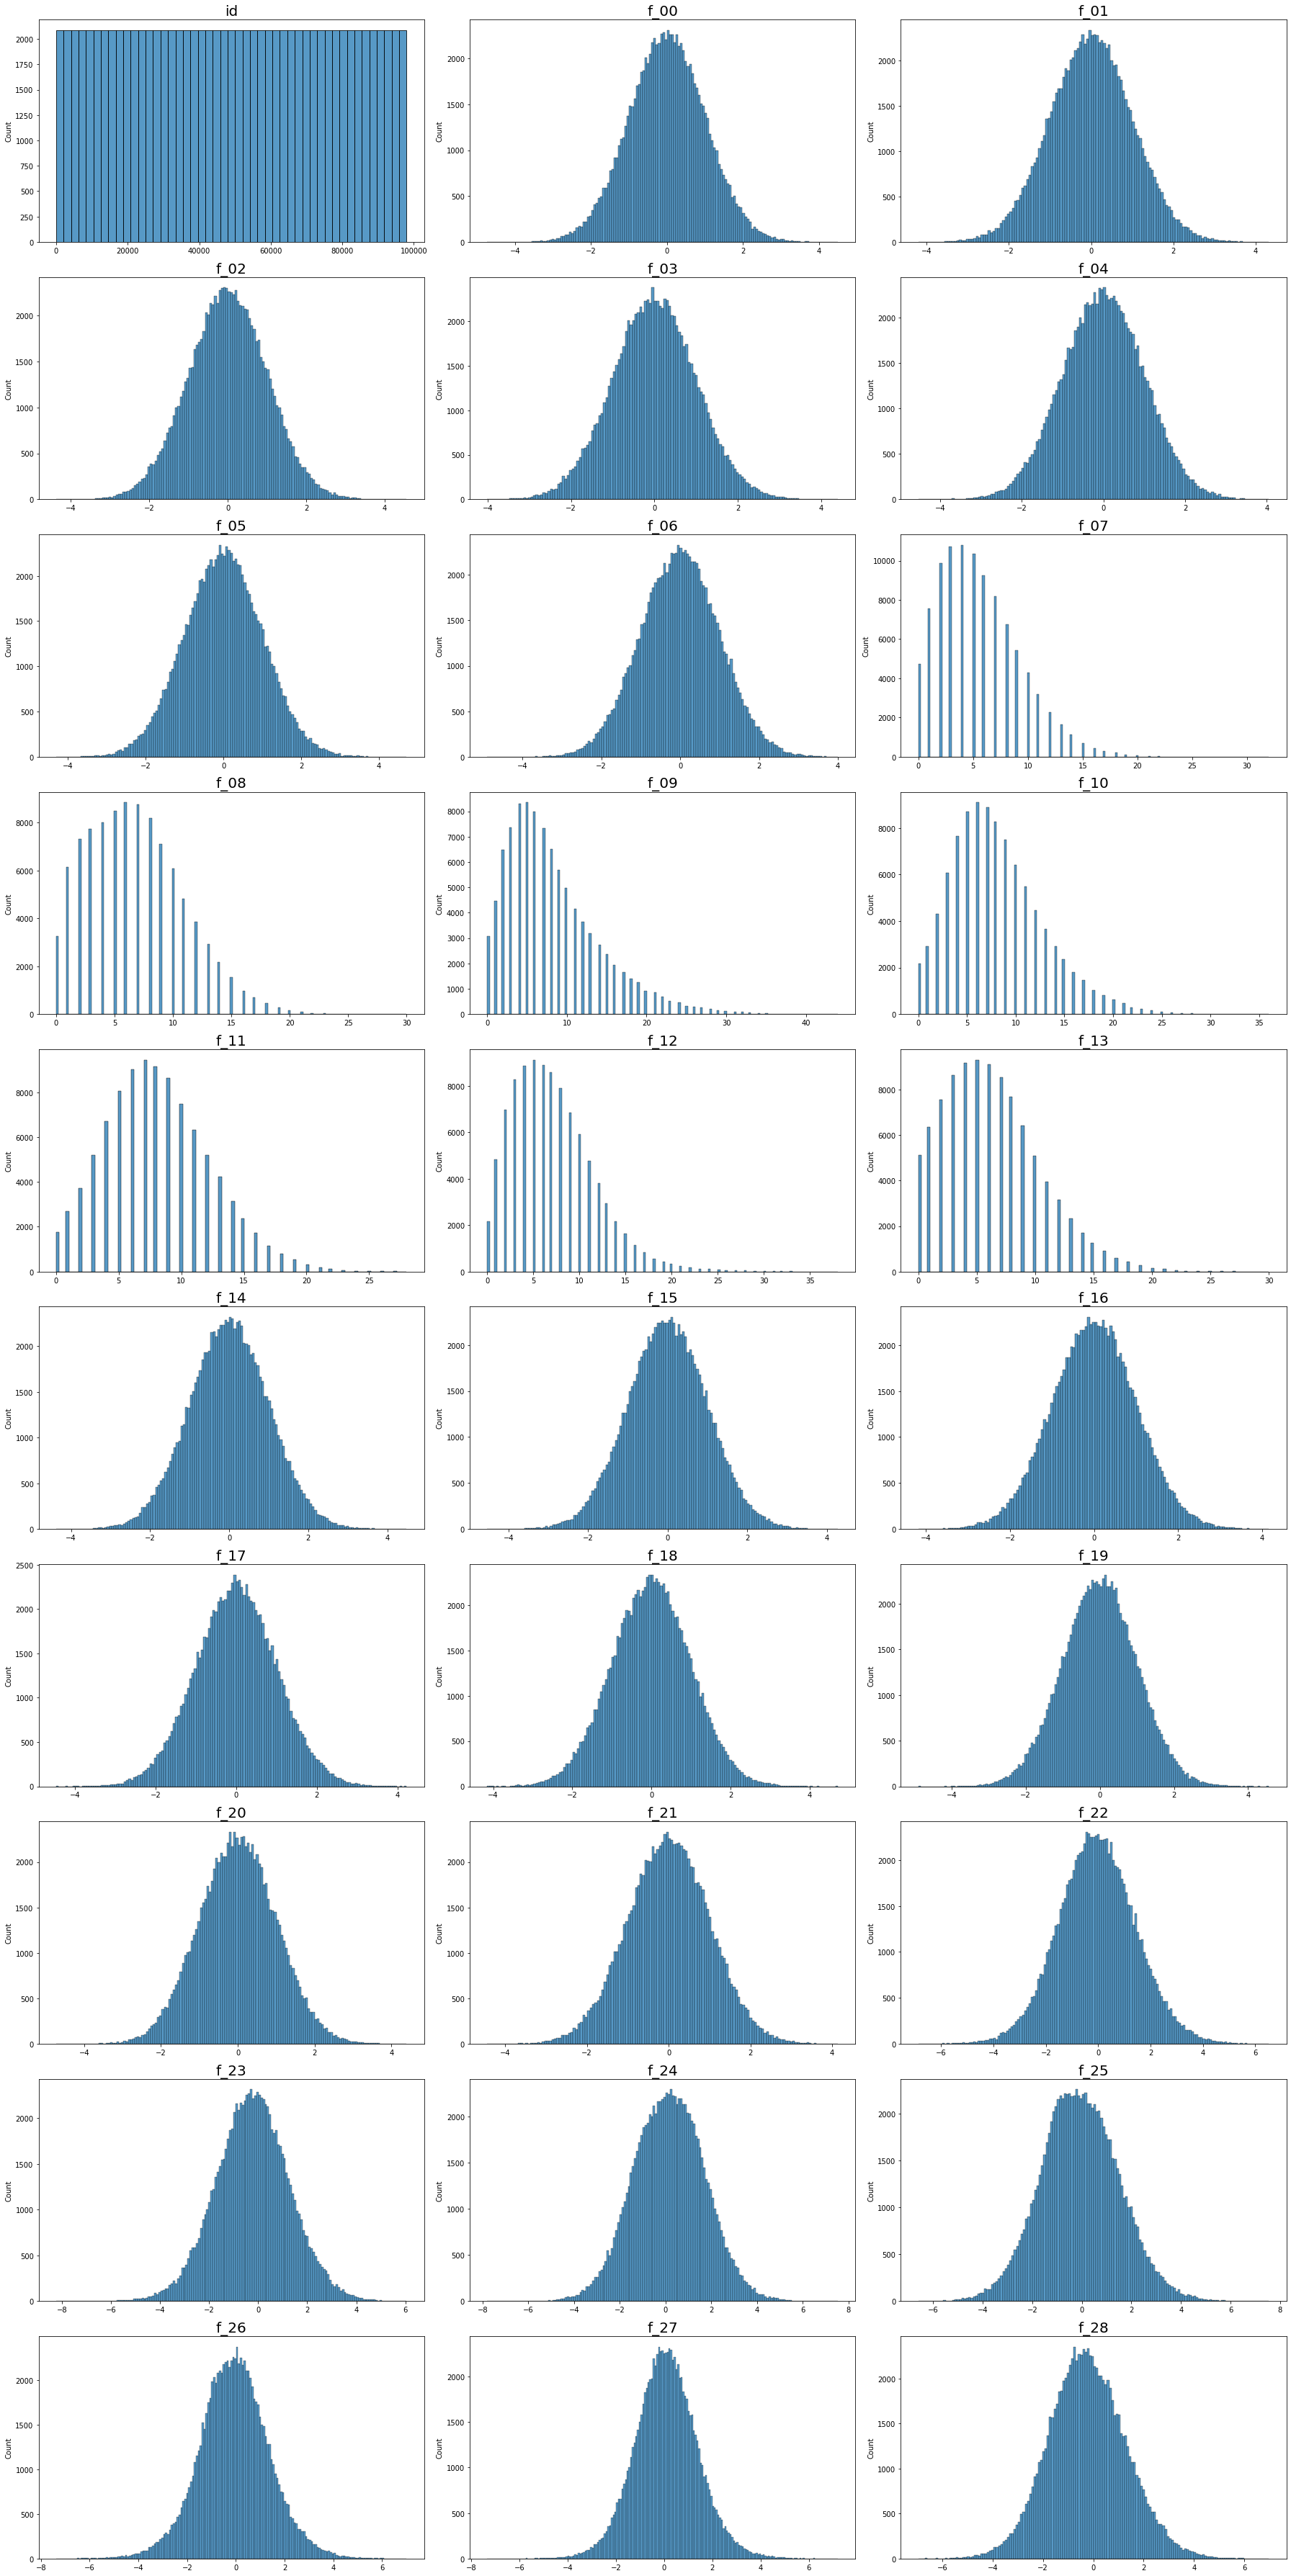

In [5]:
fig = plt.figure(figsize=(25,50));
for i,col in enumerate(df.columns):
    plt.subplot(10,3,i+1);
    sns.histplot(x=col,data=df);
    fig.tight_layout()
    plt.xlabel('');
    plt.title(col,fontsize=20);

In [6]:
X_train = df.drop(['id'], axis=1)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
df = pd.DataFrame(scaler.transform(X_train),columns= X_train.columns )
print("All features are now scaled")

All features are now scaled


Elbow Method to determine the number of clusters to be formed:


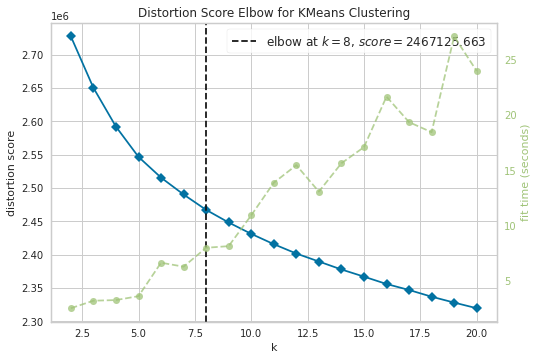

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df)
Elbow_M.show()

In [16]:
kmeans = KMeans(n_clusters=8, random_state=0)
X_train['cluster'] = kmeans.fit_predict(X_train)

In [17]:
submission = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
submission['Predicted'] = X_train['cluster']
# pd.DataFrame(oof).to_csv('oof_2.csv', index=False)
submission.to_csv('submission.csv', index=False)
display(pd.read_csv('submission.csv'))

,Id,Predicted
0,0,1
1,1,3
2,2,1
3,3,0
4,4,6
...,...,...
97995,97995,6
97996,97996,6
97997,97997,0
97998,97998,0


## Referells - 

- https://www.kaggle.com/code/ayushv322/tabular-playground-july-kmeans-clustering